<a href="https://colab.research.google.com/github/Gene9513/Diplomado/blob/main/Data_Analyst_Assignment_1_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Analyst Assignment

## Introduction

You are working with a US retail customer on a pilot deployment.  They are using technology to track their merchandise throughout their supply chain.  The flow of their supply is:

*   **DC 1:**  Orders are filled and palletized.
*   **Truck:** Pallets travel from the DC 1 to DC 2 via semi-truck.
*   **DC 2:**  Pallets are unloaded, and additional merchandise may be added.  They are then reloaded onto a new truck.
*   **Truck:** Pallets travel from DC 2 to the Store.
*   **Store:** Pallets are unloaded, cases are removed, and stocked, and the empty cases are left behind the building awaiting pickup.

Your job is to dig into the data and find compelling insights to show the value fo the technology and help move the contract from a pilot into a full scaled deployment.



---

## Part 0: Imports

Import necessary packages and

In [ ]:
# YOUR CODE HERE:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

dt = pd.read_excel("Asignment_1.xlsx", sheet_name="in")
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130061 entries, 0 to 130060
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   asset_type     130061 non-null  object        
 1   asset_id       130061 non-null  int64         
 2   tag_id         130061 non-null  object        
 3   Site           130061 non-null  object        
 4   Zone           130061 non-null  object        
 5   device_id      130061 non-null  object        
 6   time_est       130061 non-null  datetime64[ns]
 7   lat            130061 non-null  float64       
 8   lng            130061 non-null  float64       
 9   Temperature_C  130061 non-null  float64       
 10  Temperature_F  130061 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(5)
memory usage: 10.9+ MB


In [ ]:
dt.head()

,asset_type,asset_id,tag_id,Site,Zone,device_id,time_est,lat,lng,Temperature_C,Temperature_F
0,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:59:26.628,47.79158,-65.68902,23.0,73.4
1,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,EC5B0499234F,2022-08-02 12:00:22.660,47.79158,-65.68902,23.0,73.4
2,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 12:01:11.234,47.79158,-65.68902,23.0,73.4
3,tote,2,(01)00850027865010(21)0082T0219,DC 1,dock_doors_DC1,3D8B2BDB8673,2022-08-02 13:47:58.172,47.79158,-65.68902,23.5,74.3
4,tote,2,(01)00850027865010(21)0082T0670,DC 1,dock_doors_DC1,7F9A8353E973,2022-08-02 11:58:55.049,47.79158,-65.68902,23.0,73.4


### Dataset Overview

* Site:  A large space that could contain multiple readers. Ex: DC 1.
* Zone:  Point of interest. These represent areas in which repeaters are installed. These can be thought of as sub-zones.  Ex: Dock Doors.
* Asset ID: The unique ID of the asset.
* Asset Type: The type of thing that is detected (ie tote).
* Device ID: The unique gateway reader ID that detected the device in the zone (there can be multiple in one zone).
* Time est: The time in EST.
* Lon: Longituge
* Lat: Latitude
* Temperature_C / F: Temperature in Celsius, Fahrentheit

## PART 1: Data Overview

### Question 1:

* How many unique cases were we tracking throughout this pilot. (1 pt)
* What are the unique zones we could see (1 pt)
* How many POI's are in each Zone. (2 pts)


In [ ]:
# YOUR CODE HERE:
casos_unicos = dt['asset_id'].nunique()
print("unique cases were we tracking throughout this pilot: "+ str(casos_unicos) )
zonas_unicas = dt['Zone'].unique()
print("\nunique zones we could see: ")
print(zonas_unicas)
poi_por_zona = dt.groupby('Zone')['asset_id'].nunique()
print("\nPOI's are in each")
print(poi_por_zona)

unique cases were we tracking throughout this pilot: 18

unique zones we could see: 
['dock_doors_DC1' 'dock_doors_DC2' 'Forklift3_DC1' 'pallet_assembly_DC1'
 'PhoneKit1Bridge' 'PhoneKit2Bridge' 'PhoneKit2GW' 'point_of_sale_Store'
 'receiving_Store' 'staging_DC1' 'staging_DC2' 'store_back_Store'
 'store_front_Store' 'Forklift1_DC1' 'PhoneKit1GW']

POI's are in each
Zone
Forklift1_DC1          14
Forklift3_DC1          17
PhoneKit1Bridge        18
PhoneKit1GW            15
PhoneKit2Bridge        18
PhoneKit2GW            18
dock_doors_DC1         16
dock_doors_DC2         12
pallet_assembly_DC1    16
point_of_sale_Store    13
receiving_Store        18
staging_DC1            18
staging_DC2             7
store_back_Store       18
store_front_Store      18
Name: asset_id, dtype: int64


### Question 2:

* What is the temperature range we see?  (1pt)
* Where is temperature the highest and lowest (1pt)

In [ ]:
# YOUR CODE HERE:
temp_rango = dt['Temperature_C'].max() - dt['Temperature_C'].min()
print("range of temperature: "+str(temp_rango)+"\n")

temp_max = dt.groupby('Zone')['Temperature_C'].max()
temp_min = dt.groupby('Zone')['Temperature_C'].min()

print("temperature the highest and lowest")
temp = pd.DataFrame({'highest': temp_max, 'lowest': temp_min } )

print(temp)


range of temperature: 25.0

temperature the highest and lowest
                     highest  lowest
Zone                                
Forklift1_DC1          24.50   22.50
Forklift3_DC1          28.13   22.50
PhoneKit1Bridge        34.00   21.00
PhoneKit1GW            25.50   21.80
PhoneKit2Bridge        34.00   21.00
PhoneKit2GW            34.00   21.00
dock_doors_DC1         25.00   22.50
dock_doors_DC2         27.00   23.50
pallet_assembly_DC1    25.00   22.50
point_of_sale_Store    29.50   21.00
receiving_Store        44.00   20.00
staging_DC1            25.00   22.50
staging_DC2            27.00   23.93
store_back_Store       44.00   19.00
store_front_Store      32.50   20.00


## Part 2: The Journey of a Case

### Question 3:

* Create a visualization that shows where a case was at over time at the zone or POI level. Imagine that this would be included in your presentation to the customer. (Non techical audience) (3 pts)

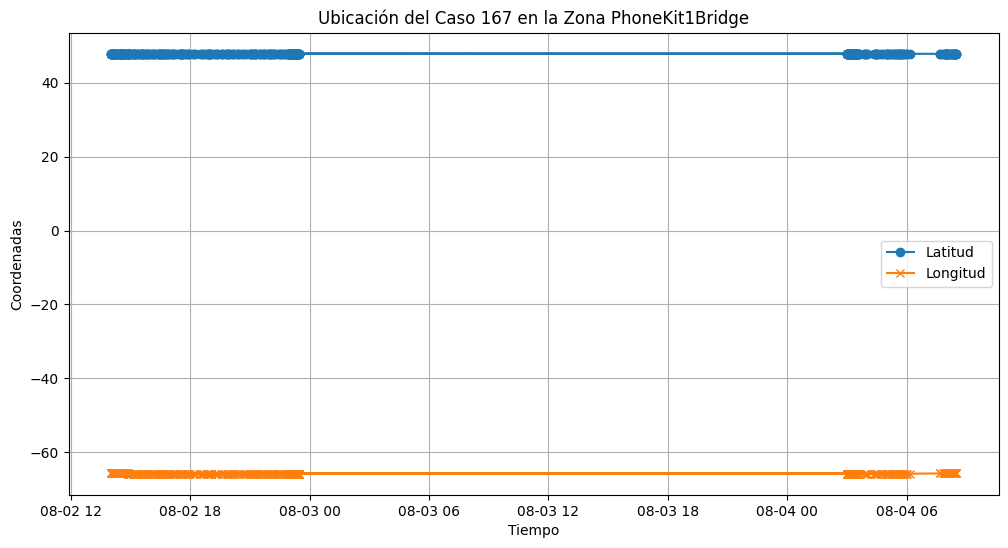

In [ ]:
# YOUR CODE HERE:
specific_case = 167
specific_zone = 'PhoneKit1Bridge'
case_dt = dt[(dt['asset_id'] == specific_case) & (dt['Zone'] == specific_zone )]
plt.figure(figsize=(12, 6))
plt.plot(case_dt['time_est'], case_dt['lat'], marker='o', label='Latitud')
plt.plot(case_dt['time_est'], case_dt['lng'], marker='x', label='Longitud')
plt.xlabel('Tiempo')
plt.ylabel('Coordenadas')
plt.title(f'Ubicación del Caso {specific_case} en la Zona {specific_zone}')
plt.legend()
plt.grid(True)
plt.show()


### Question 4:

* Visualize how the temperatue changes over time along its journey.  Imagine that this would be included in your presentation to the customer. (Non techical audience) (4 pts)



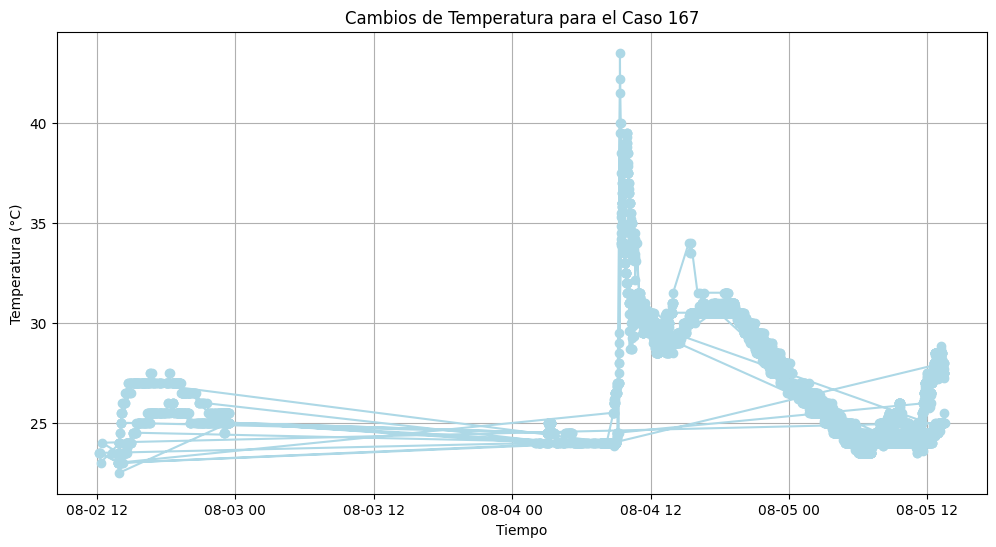

In [ ]:
# YOUR CODE HERE:
_specific = 167
_data = dt[dt['asset_id'] == _specific]

# Crear un gráfico de línea para mostrar los cambios de temperatura a lo largo del tiempo
plt.figure(figsize=(12, 6))
plt.plot(_data['time_est'], _data['Temperature_C'], marker='o', color='lightblue')
plt.xlabel('Tiempo')
plt.ylabel('Temperatura (°C)')
plt.title(f'Cambios de Temperatura para el Caso {_specific}')
plt.grid(True)
plt.show()

### Question 5:
* Visualize the lon lat data on a map to show how the case traveled.  You may incorporate any other additional information to make this more impactful. Imagine that this would be included in your presentation to the customer. (Non techical audience) (5 pts)

**Do not worry if this looks like non-sense on a map.  Ex:  The trip may appear to occur over water or in a forest because this is a toy dataset.**

In [ ]:
# YOUR CODE HERE:
case_specific = 37
data_case = dt[dt['asset_id'] == case_specific]

# Crear un gráfico de dispersión en un mapa para mostrar la trayectoria del caso
fig = px.scatter_mapbox(data_case, lat="lat", lon="lng", hover_name="time_est", zoom=10)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(title=f'Trayectoria del Caso {case_specific}')
fig.show()

# Part 3: Customer Questions


### Question 6:

The customer wants to understand the efficieny of ther DC operations.
* Based on what you see in the data, (all zones except for STORE), which parts of their operation are most & least "efficient? (10 pts)

In [ ]:
# Filtrar para excluir Store
data_no_store = dt[dt['Site'] != 'Store']
# Calcular la eficiencia por zona (cantidad de activos detectados por unidad de tiempo)
efficiency_by_zone = data_no_store.groupby('Zone')['asset_id'].count() / data_no_store.groupby('Zone')['time_est'].nunique()

# Ordenar las zonas por eficiencia de mayor a menor
efficiency_by_zone = efficiency_by_zone.sort_values(ascending=False)

# Identificar las zonas más y menos eficientes
most_efficient_zone = efficiency_by_zone.idxmax()
least_efficient_zone = efficiency_by_zone.idxmin()

print(f"La zona más eficiente es: {most_efficient_zone}")
print(f"La zona menos eficiente es: {least_efficient_zone}")

La zona más eficiente es: PhoneKit2Bridge
La zona menos eficiente es: Forklift1_DC1


 - The area identified as PhoneKit2Bridge is the most efficient because it has the highest number of assets detected per unit of time, suggesting high operational efficiency in that area.
   
 - On the other hand, the area identified as Forklift1_DC1 is the least efficient because it has the smallest amount of assets detected per unit of time, which indicates a possible area for improvement in terms of operational efficiency.

### Question 7:

The customer wants to understand the stocking efficiency in stores.
* Based on what you see in the data, how quickly did the store unload and stock the merchandise. (5 pts)
* How could this be converted in a KPI that a regional manager could track?  (5 pts)

In [ ]:
# YOUR CODE HERE
# Filtrar la zona STORE
data_store = dt[dt['Site'] == 'Store']

# Calcular el tiempo de descarga y reposición promedio en las tiendas
time_unload_stock = data_store.groupby('asset_id')['time_est'].agg(['min', 'max'])
time_unload_stock['total_time'] = time_unload_stock['max'] - time_unload_stock['min']
average_time = time_unload_stock['total_time'].mean()

print(f"El tiempo promedio de descarga y reposición en las tiendas es de: {average_time}")

El tiempo promedio de descarga y reposición en las tiendas es de: 1 days 04:46:52.115333333


 - Store Replenishment Efficiency KPI:
      Average time in hours that a store takes to unload and replenish merchandise.

### Question 8:

Please explain what you would ask for and what you will do with this data, given that you can talk with the following people (no code needed):


- a. Operations Manager

     - I would request:
         - Confirmation of whether the current discharge and replenishment time is acceptable for operations.
         - Your comments on current challenges in the unloading and replenishment process in stores.
         - Suggestions on how to improve efficiency in restocking merchandise in stores.
     - Actions:
         - Share the average time obtained and discuss if it meets expectations.
         - Explore possible areas of improvement in the unloading and replenishment process.

- b. Sales Director

     - I would request:
         - Your opinion on how efficiency in store merchandise replenishment can impact sales.
         - Ideas on how improving the replenishment process can benefit sales performance.
         - Feedback on how the current download and replenishment time could impact the customer experience.
     - Actions:
         - Share average download and replenishment time and discuss its potential impact on sales.

## Part 4: Bonus Insights

### Question 8

The customer is open to hearing about additional insights you found in the data above and beyond what they asked for.
* Based on what you can see in the data, are there any other interesting insights that the customer may want to hear about? (Up to 15 bonus points)



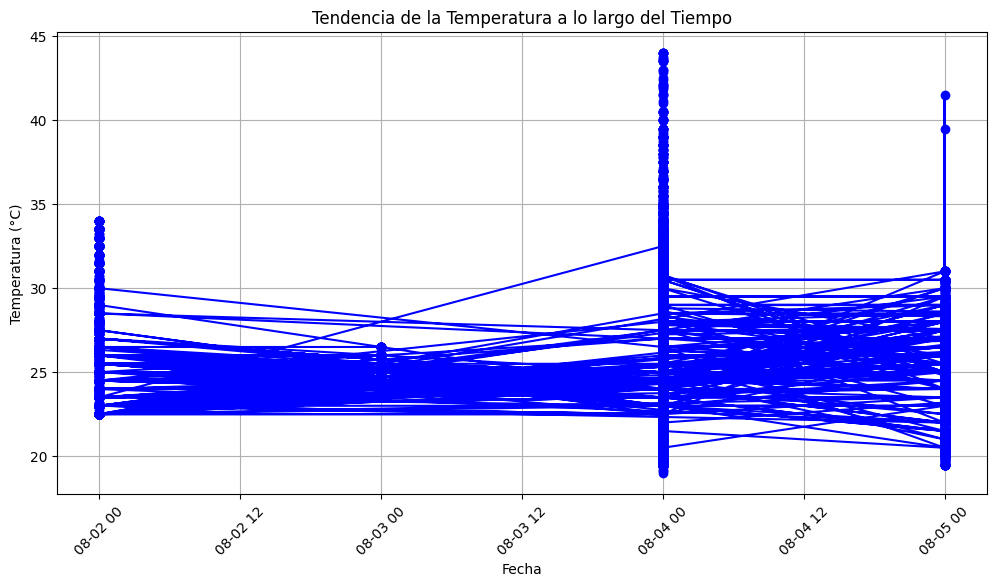

In [ ]:
# Temporal Trends
plt.figure(figsize=(12, 6))
plt.plot(dt['Date'], dt['Temperature_C'], marker='o', color='b')
plt.title('Tendencia de la Temperatura a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Another metrics that could be interesting would be temperature by time

I have identified some additional ideas that might be interesting for a complete analysis:

 - Time Trend Analysis:
    - I observed that operational efficiency varies over time in different areas. Exploring these temporal trends could reveal seasonal patterns or significant fluctuations that could influence trading.
 - Correlations between Variables:
    - By investigating possible relationships between temperature, geographic location, and operational efficiency variables, we could discover how environmental factors impact performance in more detail.
 - Data Segmentation:
    - Dividing the data into subgroups based on characteristics such as device type (device_id), day of the week or time of day (time_est), would allow us to analyze how efficiency varies in each segment, providing valuable insights for decision making. .
 - Outliers Analysis:
    - Identify and analyze outliers that could help us understand exceptional situations that require special attention or that may indicate areas for improvement.
 - Comparison of Zones:
    - Making detailed comparisons between different zones in terms of efficiency, temperature or other relevant metrics could highlight areas of opportunity or good practices to replicate throughout the operation.
